# Plotting with pandas

Pandas has a plotting interface that uses matplotlib to create visualizations of your data. We will use the SPC tornado dataset to explore some of these visualizations.

There are major types of plots provided by the pandas matplotlib interface.

The ```df.plot()``` method will create a line plot based on the input data. However, you can make many other types of plots:

Example from the <a href=https://pandas.pydata.org/docs/user_guide/visualization.html>pandas</a> documentation for ```df.plot.bar()```:

![Bar Chart example](https://pandas.pydata.org/docs/_images/bar_plot_ex.png)

Example for ```df.plot.barh()```:

![Horizontal Bar Chart example](https://pandas.pydata.org/docs/_images/barh_plot_stacked_ex.png)

Example for ```df.plot.hist()```:

![Histogram Example](https://pandas.pydata.org/docs/_images/hist_new.png)

Example for ```df.plot.box()```:

![Boxplot Example](https://pandas.pydata.org/docs/_images/box_plot_new.png)

Example for ```df.plot.area()```:

![Area plot example](https://pandas.pydata.org/docs/_images/area_plot_stacked.png)

Example for ```df.plot.scatter()```:

![Scatterplot Example](https://pandas.pydata.org/docs/_images/scatter_plot.png)

Example for ```df.plot.hexbin()```:

![Hexbin Example](https://pandas.pydata.org/docs/_images/hexbin_plot.png)

Example for ```df.plot.pie()```:

![Pieplot Example](https://pandas.pydata.org/docs/_images/series_pie_plot.png)



### Read in the tornado dataset

In [1]:
import pandas as pd

df = pd.read_csv("1950-2023_actual_tornadoes.csv")

df

,om,yr,mo,dy,date,time,tz,st,stf,stn,...,len,wid,ns,sn,sg,f1,f2,f3,f4,fc
0,192,1950,10,1,1950-10-01,21:00:00,3,OK,40,23,...,15.80,10,1,1,1,25,0,0,0,0
1,193,1950,10,9,1950-10-09,02:15:00,3,NC,37,9,...,2.00,880,1,1,1,47,0,0,0,0
2,195,1950,11,20,1950-11-20,02:20:00,3,KY,21,1,...,0.10,10,1,1,1,177,0,0,0,0
3,196,1950,11,20,1950-11-20,04:00:00,3,KY,21,2,...,0.10,10,1,1,1,209,0,0,0,0
4,197,1950,11,20,1950-11-20,07:30:00,3,MS,28,14,...,2.00,37,1,1,1,101,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70017,623328,2023,9,26,2023-09-26,15:05:00,3,FL,12,0,...,0.01,5,1,1,1,19,0,0,0,0
70018,623329,2023,9,28,2023-09-28,13:40:00,3,OH,39,0,...,0.01,25,1,1,1,97,0,0,0,0
70019,623330,2023,9,29,2023-09-29,18:48:00,3,MN,27,0,...,0.69,25,1,1,1,171,0,0,0,0
70020,623304,2023,9,2,2023-09-02,10:11:00,3,LA,22,0,...,0.69,75,1,1,1,51,0,0,0,0


### We might want to look at the climatology of tornadoes

What are some questions we might ask?

What is the typical count of tornadoes per year?
What state has experienced the most tornadoes?
What month experiences the most tornadoes?
What hour of the day experiences the most tornadoes?

These are questions like the ones you will answer on Homework 5. 

We will be looking at different questions, but the syntax and patterns you see will help you on that assignment.

First, we want to subset the tornado dataset for a period in which the data are relatively ```stationary```. In this case, we do not want to introduce observational bias into our analysis.

We can plot the count of tornadoes per year to see if there is a temporal bias:

<Axes: xlabel='yr'>

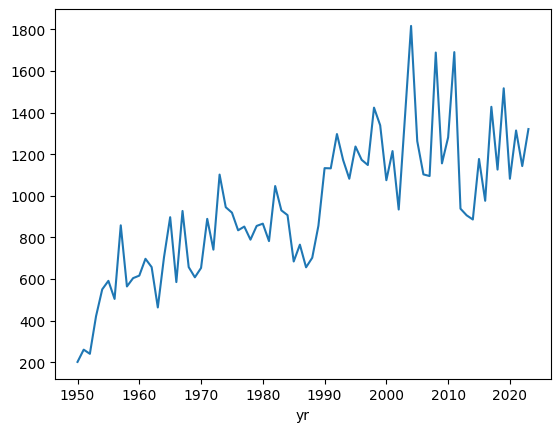

In [2]:
year = df.groupby('yr').size()

year.plot()

We notice that there is a strong temporal trend. Is this trend real? We can examine this by looking at EF1 or greater tornadoes only. These types of tornadoes are more reliably observed throughout the tornado dataset record.

We can subset the dataset to only give us EF1 or greater storms, and then recreate the plot:

<Axes: xlabel='yr'>

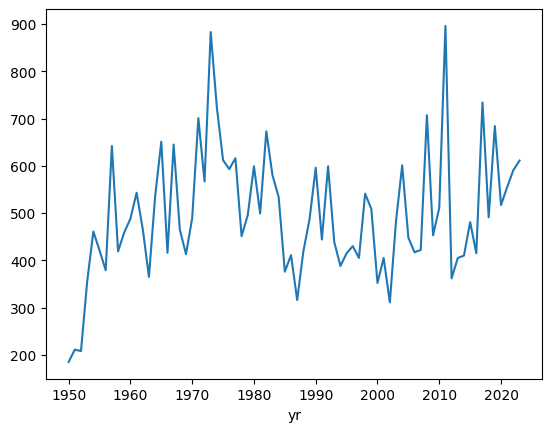

In [3]:
ef1 = df[df['mag'] >= 1]

ef1_yr = ef1.groupby('yr').size()

ef1_yr.plot()

We can see that the trend has been removed after approximately 1960. So, lets only examine tornadoes with a magnitude of F/EF1 or greater and only after 1960.

<Axes: xlabel='yr'>

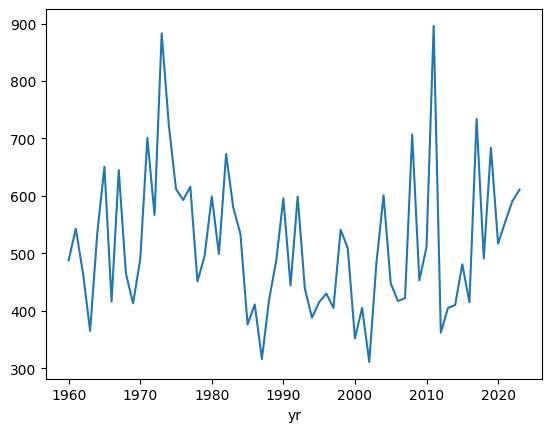

In [4]:
ef1_1960_2023 = ef1[ef1['yr'] >= 1960]

ef1_1960_2023_yr = ef1_1960_2023.groupby('yr').size()

ef1_1960_2023_yr.plot()

If we instead want to visualize this as a barchart, it is very simple to change:

<Axes: xlabel='yr'>

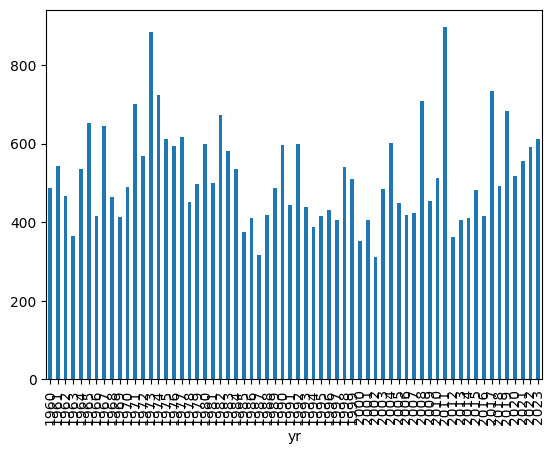

In [5]:
ef1_1960_2023_yr.plot.bar()

The years are kind of hard to read, so we can also change the figure size by using the ```bar()``` parameter named ```figsize``` which takes a ```tuple``` that defines the size of the figure in the pattern of (width, height):

In other words, figsize=(20, 10) makes a figure of size 20 by size 10.

This sometimes takes some tweaking to get it just right, so feel free to change those numbers to create a plot that you like looking at.

<Axes: xlabel='yr'>

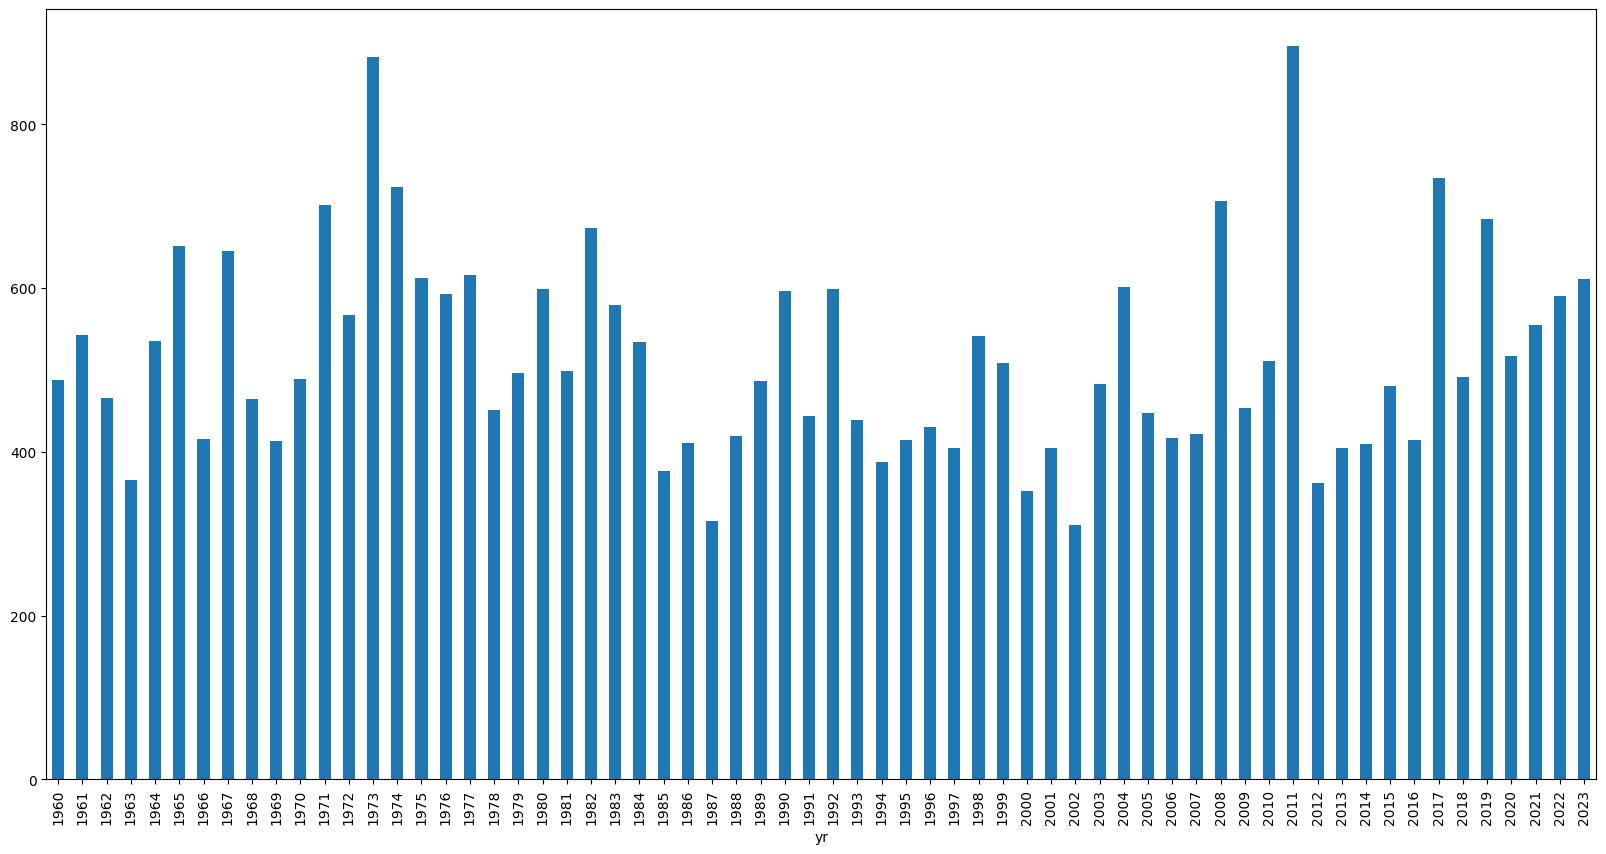

In [6]:
ef1_1960_2023_yr.plot.bar(figsize=(20, 10))

We can create a histogram to get an idea of the typical year and spread of annual EF1+ tornado counts:

<Axes: ylabel='Frequency'>

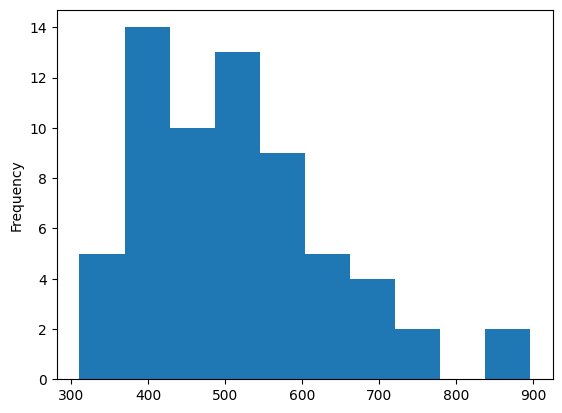

In [7]:
ef1_1960_2023_yr.plot.hist()

This suggests that there are typically 400 - 600 EF1+ tornadoes in any given year, with a long tail that reaches ~900.

What years have over 800 EF1+ tornadoes?

In [8]:
ef1_1960_2023_yr[ef1_1960_2023_yr > 800]

yr
1973    883
2011    896
dtype: int64

We see the top year is 2011, which was no doubt influenced by the events of April 27th, 2011.

We can also describe this using boxplots:

<Axes: >

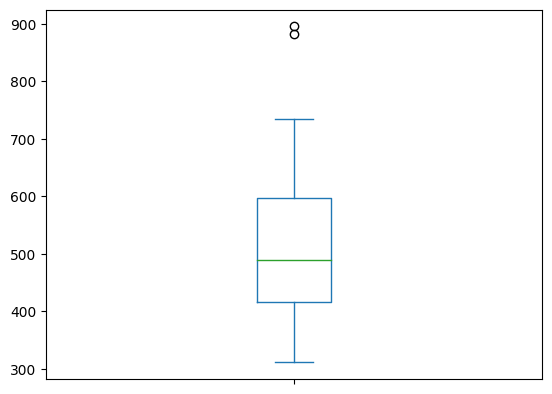

In [9]:
ef1_1960_2023_yr.plot.box()

If we wanted to visualize where tornadoes occur, we could use scatter and plot the slat and slon:

<Axes: xlabel='slon', ylabel='slat'>

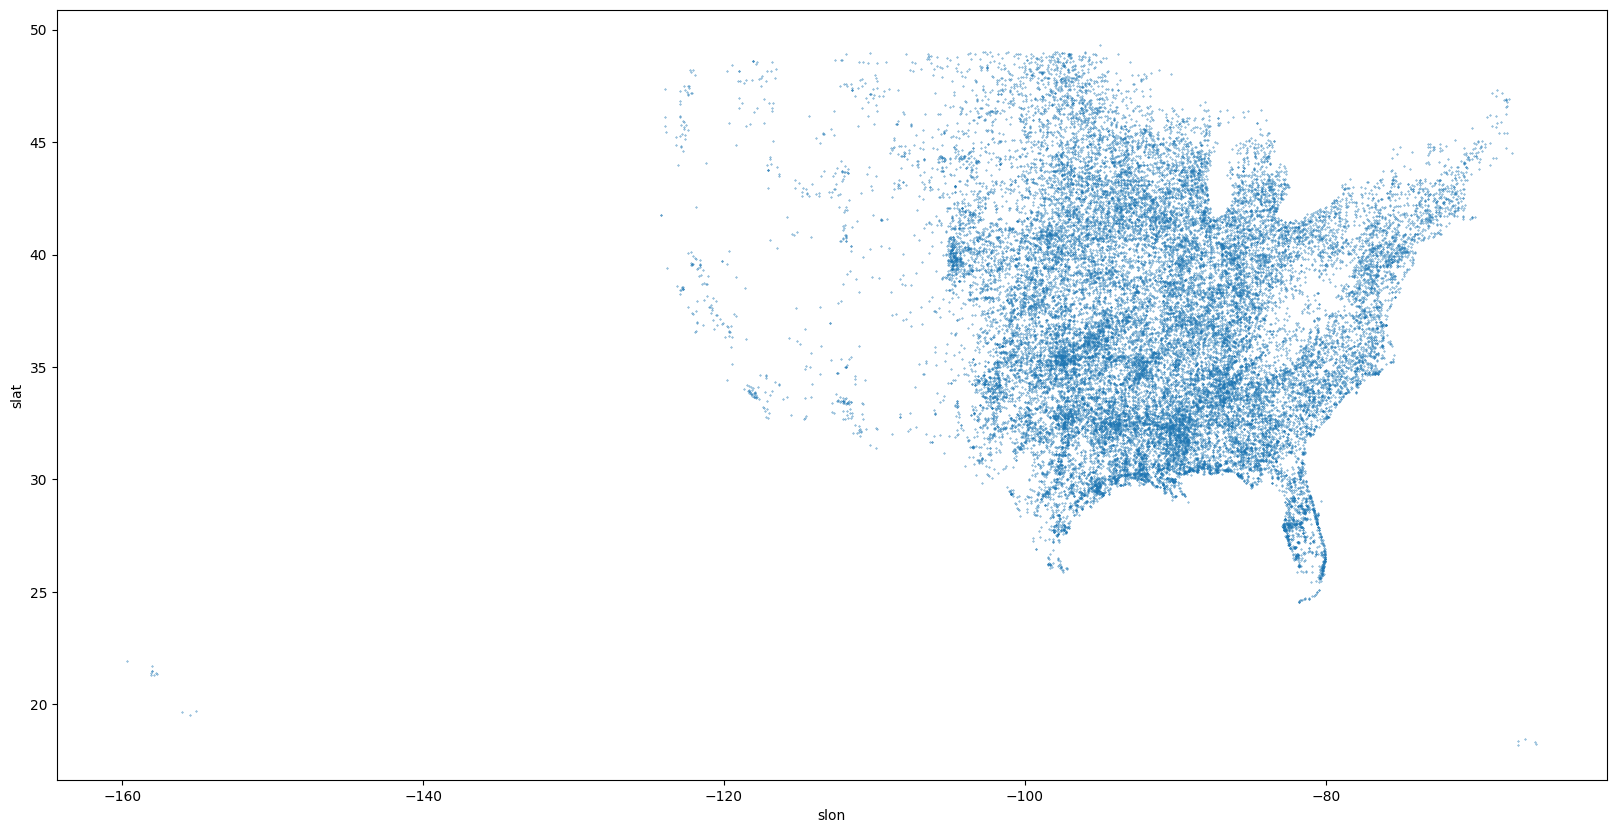

In [10]:
ef1_1960_2023[['slon', 'slat']].plot.scatter(x='slon', y='slat', figsize=(20, 10), s=0.1)

or a 2D hexbin:

<Axes: xlabel='slon', ylabel='slat'>

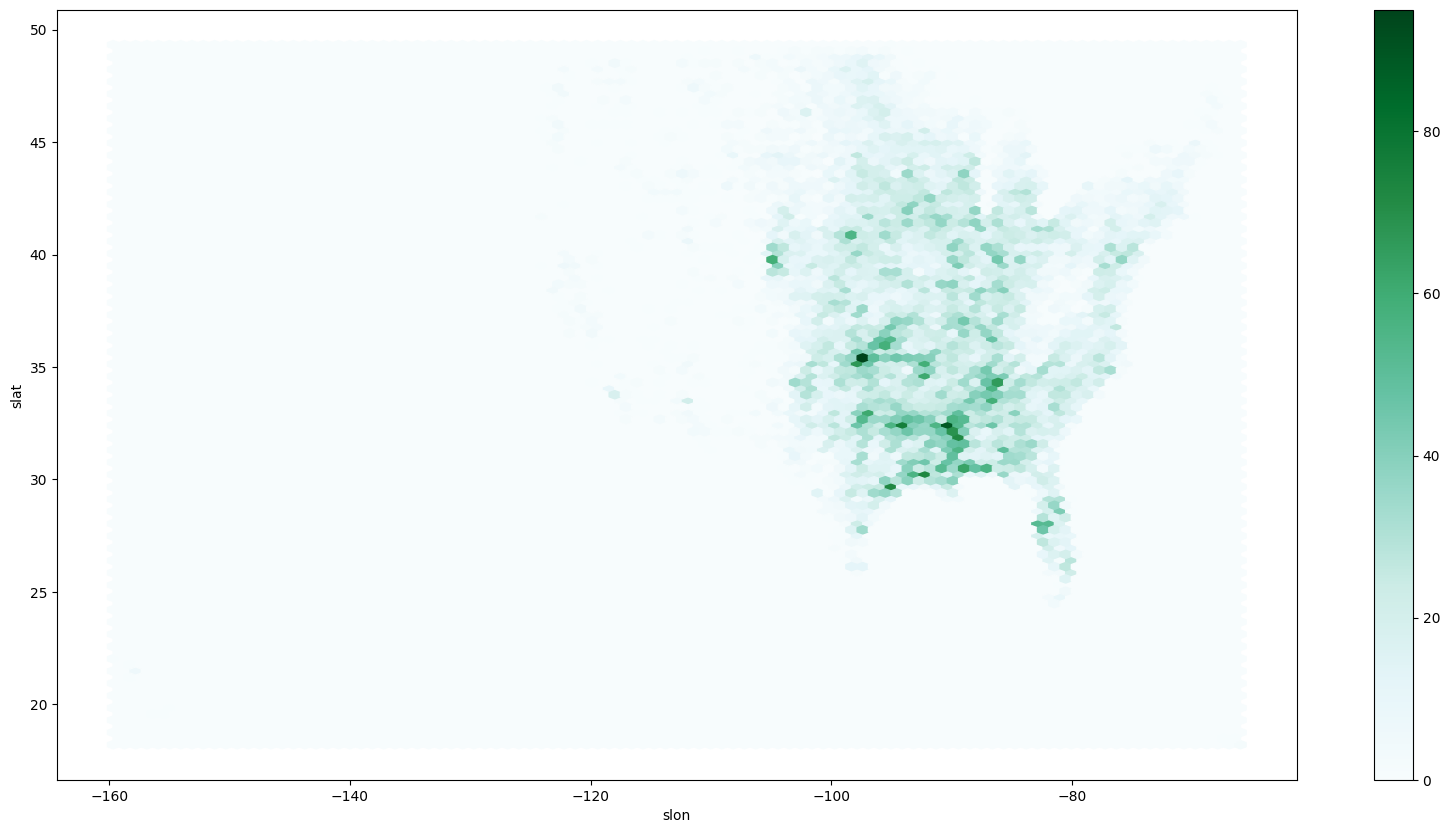

In [11]:
ef1_1960_2023[['slon', 'slat']].plot.hexbin(x='slon', y='slat', figsize=(20, 10))

You can see what proportion of deaths are associated with each F/EF magnitude:

<Axes: ylabel='fat'>

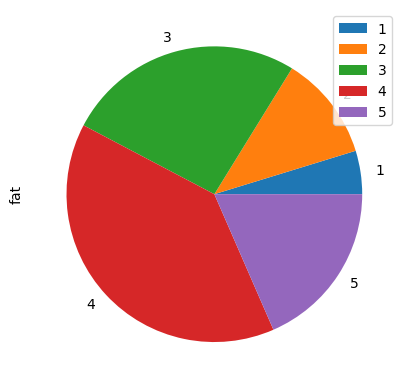

In [12]:
deaths_per_mag = ef1_1960_2023[['fat', 'mag']].groupby('mag').sum()

deaths_per_mag.plot.pie(y='fat')